# Assignment 3


### Relativity visualization and radiation

On this homework assignment, you will be responsible for importing all of the python packages you need for your calculations. You will also be responsible for making your plot axis labels large enough for me to read them easily. Please make sure to put units on your axes where appropriate.

Instead of defining your own constants, use the pre-programmed values from <tt>scipy.constants</tt>.

In [1]:
import scipy.integrate as spi
import numpy as np
import numpy as np
import matplotlib.pyplot as plt

 # Contains physical constants defined in SI units (default) as well as other systems
from scipy import constants

# Make easily readable plots with large axis labels
plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif",
                     "font.sans-serif":"Arial"})
plt.rcParams["font.family"] = "DejaVu Sans"  # Available in Colab

<ol>
    <li>Recall the velocity addition example from class: Frank is on a space station, Mary is in a spacecraft moving away from the space station in the +x direction, and she is firing a proton gun at asteroids that are in the spacecraft's path.
        <ol>
            <li>Assume the protons leave the proton gun with speed 0.99c in the +x direction. Plot the proton speed measured by <em>Frank</em> as a function of spacecraft speed relative to the space station.</li>
            <li>Now suppose the protons leave the gun in a "cone" shape rather than straight along the +x axis, so that their velocity vectors have y and z components. The angle of the proton code is $15^{\circ}$, and their launch speed is still 0.99c. Plot Frank's measurement of the y-component of the proton velocity at the edge of the cone, as a function of spacecraft speed.</li>
        </ol>
    </li>
</ol>

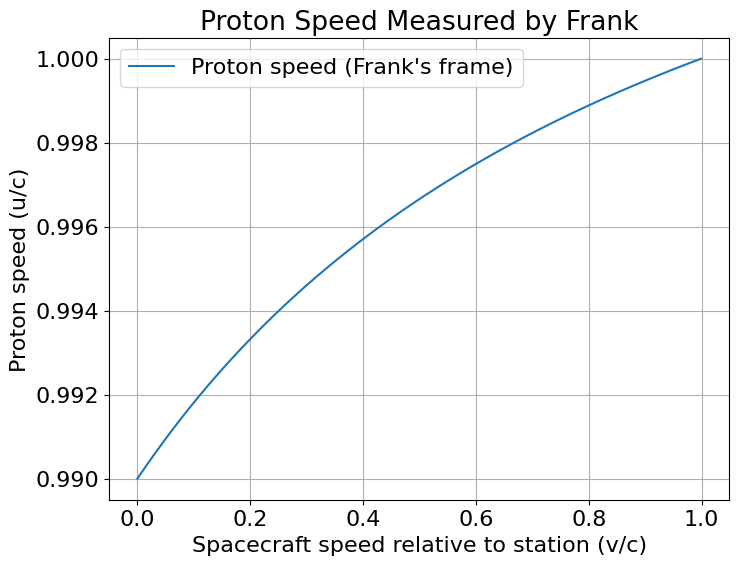

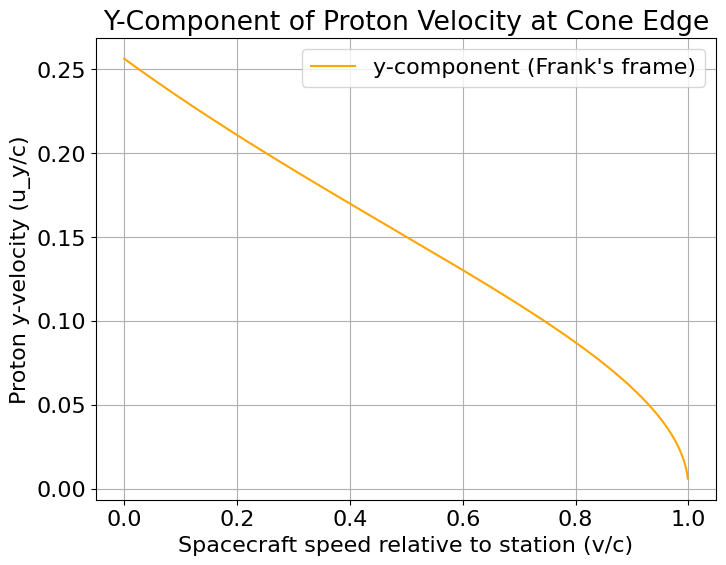

In [2]:
# Speed of light (m/s)
c = constants.c

# Proton speed in spacecraft frame (Mary's frame)
u_prime = 0.99 * c

# Range of spacecraft speeds (0 to just below c)
v = np.linspace(0, 0.999 * c, 500)

# Relativistic velocity addition for proton speed along x
u = (v + u_prime) / (1 + (v * u_prime) / c**2)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(v / c, u / c, label="Proton speed (Frank's frame)")
plt.xlabel("Spacecraft speed relative to station (v/c)")
plt.ylabel("Proton speed (u/c)")
plt.title("Proton Speed Measured by Frank")
plt.grid(True)
plt.legend()
plt.show()

# Cone angle (15 degrees) in radians
theta = np.radians(15)

# Velocity components in Mary's frame
u_prime_x = u_prime * np.cos(theta)
u_prime_y = u_prime * np.sin(theta)

# Range of spacecraft speeds
v = np.linspace(0, 0.999 * c, 500)

# Lorentz factor and denominator
gamma = 1 / np.sqrt(1 - (v**2 / c**2))
denominator = 1 + (v * u_prime_x) / c**2

# y-component in Frank's frame
u_y = u_prime_y / (gamma * denominator)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(v / c, u_y / c, label="y-component (Frank's frame)", color='orange')
plt.xlabel("Spacecraft speed relative to station (v/c)")
plt.ylabel("Proton y-velocity (u_y/c)")
plt.title("Y-Component of Proton Velocity at Cone Edge")
plt.grid(True)
plt.legend()
plt.show()

<ol start=2>
    <li>Make a 2-d plot of spacetime with $x$ on the horizontal axis and $ct$ on the vertical axis.
    <ol>
        <li>Imagine two flashbulbs positioned in the Earth's approximate rest frame with locations $x = 0$ km and $x = 300000$ km (slightly less than the moon's distance from Earth). Both bulbs flash at $t = 0$. Represent the flashes with points on your spacetime plot. Put in world lines representing travel of the light from each flash.</li>
        <li>Suppose the James Webb Space Telescope is at rest at $x = 150000$ km. Mark it on the plot with the symbol of your choice, then plot its world line.</li>
        <li>Aliens are sending a reconnaissance microprobe through the solar system at high speed. At $t = 0$, the probe is lurking at $x = 500000$ km. In the (approximate) rest frame of observers on Earth, the microprobe moves at speed $0.1c$ in the -x direction. Mark the probe's position at $t = 0$ and plot its world line.</li>
        </ol></li>
</ol>

Based only on your plot, would you say the flashes were simultaneous the point of view of the James Webb Space Telescope? What about from the point of view of the microprobe?

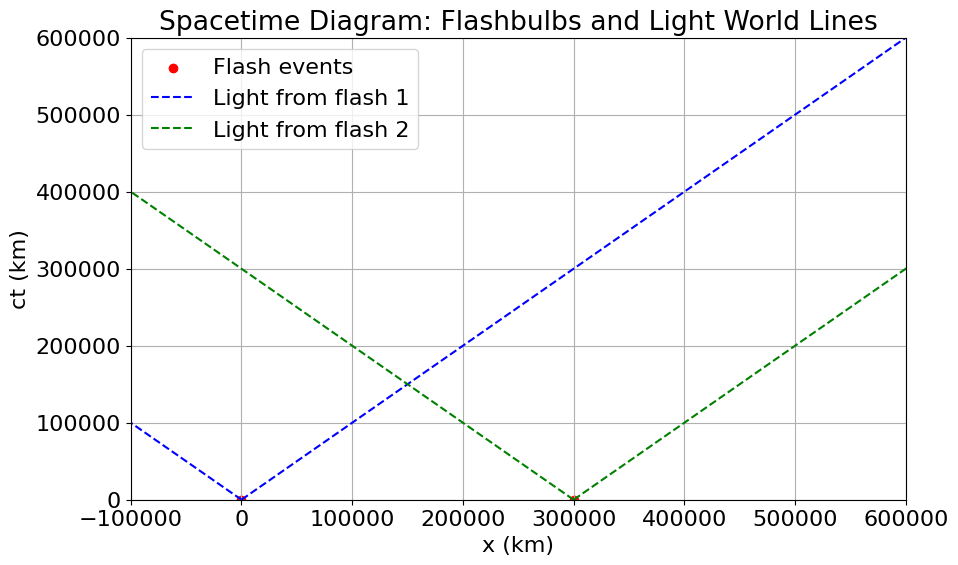

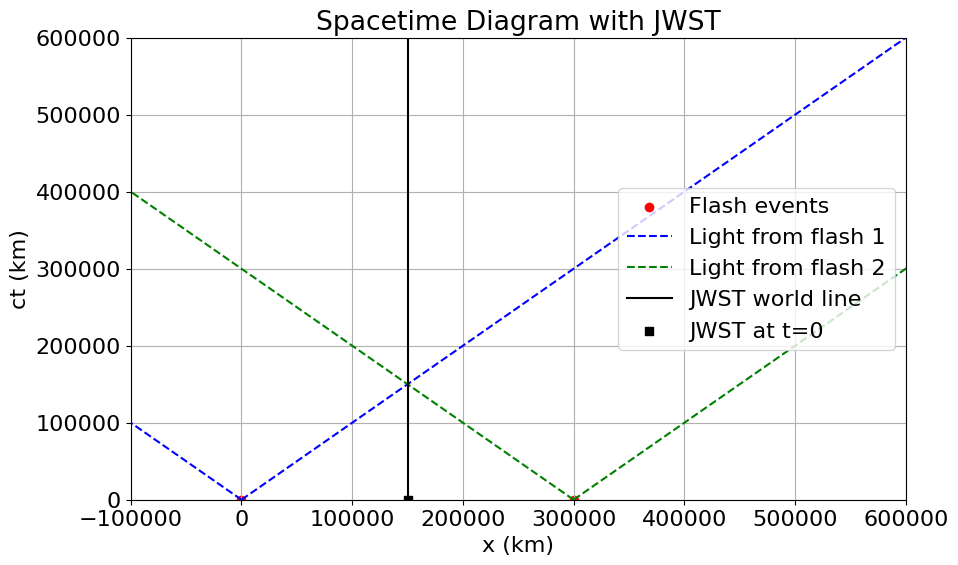

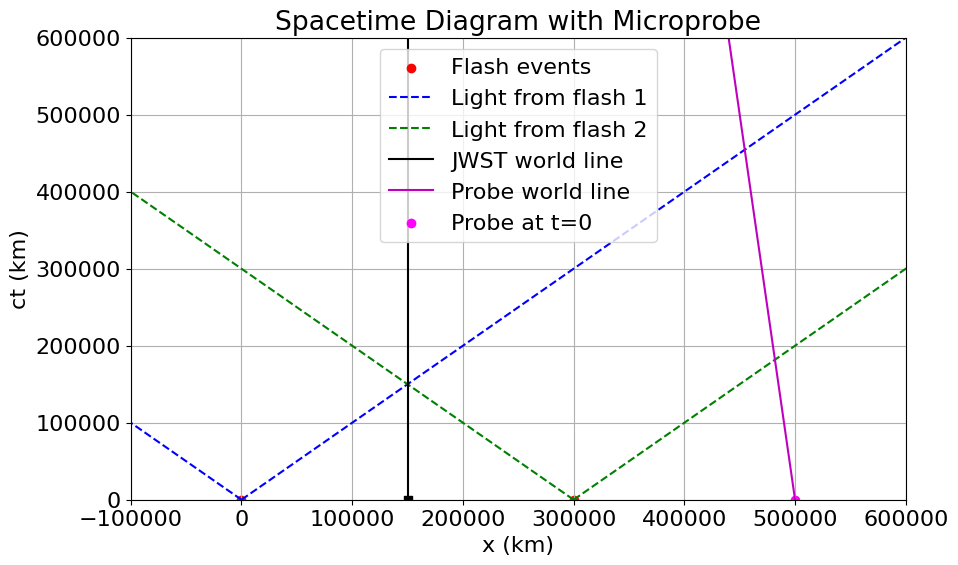

In [3]:
# Speed of light (km/s)
c = constants.c / 1000  # Convert from m/s to km/s

# Spacetime coordinates for flashes
flash1_x, flash1_ct = 0, 0  # x = 0 km, t = 0
flash2_x, flash2_ct = 300000, 0  # x = 300,000 km, t = 0

# Time range for light propagation (s)
t = np.linspace(0, 2, 100)  # Up to 2 seconds
ct = c * t  # Convert to ct (km)

# Light world lines from flash 1 (x = 0)
light1_right = ct  # x = ct
light1_left = -ct  # x = -ct

# Light world lines from flash 2 (x = 300,000 km)
light2_right = 300000 + ct  # x = 300,000 + ct
light2_left = 300000 - ct  # x = 300,000 - ct

# Plot
plt.figure(figsize=(10, 6))
plt.scatter([flash1_x, flash2_x], [flash1_ct, flash2_ct], color='red', label='Flash events')
plt.plot(light1_right, ct, 'b--', label='Light from flash 1')
plt.plot(light1_left, ct, 'b--')
plt.plot(light2_right, ct, 'g--', label='Light from flash 2')
plt.plot(light2_left, ct, 'g--')
plt.xlabel('x (km)')
plt.ylabel('ct (km)')
plt.title('Spacetime Diagram: Flashbulbs and Light World Lines')
plt.grid(True)
plt.legend()
plt.xlim(-100000, 600000)
plt.ylim(0, 600000)
plt.show()

# JWST position
jwst_x = 150000  # km

# Time range for world line
t = np.linspace(0, 2, 100)  # s
ct = c * t  # km

# Plot
plt.figure(figsize=(10, 6))
plt.scatter([flash1_x, flash2_x], [flash1_ct, flash2_ct], color='red', label='Flash events')
plt.plot(light1_right, ct, 'b--', label='Light from flash 1')
plt.plot(light1_left, ct, 'b--')
plt.plot(light2_right, ct, 'g--', label='Light from flash 2')
plt.plot(light2_left, ct, 'g--')
plt.plot([jwst_x]*len(t), ct, 'k-', label='JWST world line')
plt.scatter([jwst_x], [0], color='black', marker='s', label='JWST at t=0')
plt.xlabel('x (km)')
plt.ylabel('ct (km)')
plt.title('Spacetime Diagram with JWST')
plt.grid(True)
plt.legend()
plt.xlim(-100000, 600000)
plt.ylim(0, 600000)
plt.show()

# Microprobe initial position and velocity
probe_x0 = 500000  # km
v_probe = -0.1 * c  # km/s (negative for -x direction)

# Time range
t = np.linspace(0, 2, 100)  # s
ct = c * t  # km
probe_x = probe_x0 + v_probe * t  # Position as function of time

# Plot
plt.figure(figsize=(10, 6))
plt.scatter([flash1_x, flash2_x], [flash1_ct, flash2_ct], color='red', label='Flash events')
plt.plot(light1_right, ct, 'b--', label='Light from flash 1')
plt.plot(light1_left, ct, 'b--')
plt.plot(light2_right, ct, 'g--', label='Light from flash 2')
plt.plot(light2_left, ct, 'g--')
plt.plot([jwst_x]*len(t), ct, 'k-', label='JWST world line')
plt.scatter([jwst_x], [0], color='black', marker='s')
plt.plot(probe_x, ct, 'm-', label='Probe world line')
plt.scatter([probe_x0], [0], color='magenta', marker='o', label='Probe at t=0')
plt.xlabel('x (km)')
plt.ylabel('ct (km)')
plt.title('Spacetime Diagram with Microprobe')
plt.grid(True)
plt.legend()
plt.xlim(-100000, 600000)
plt.ylim(0, 600000)
plt.show()

The flashes are simultaneous from the JWST's point of view (same ct=0).
The flashes are not simultaneous from the microprobe's point of view due to its motion, causing a relative tilt in its perception of the time axis.

<ol start=3>
    <li>Use Wien's displacement law, $\lambda_{\rm max} = \frac{2.898 \times 10^{-3} \mathrm{m} \cdot \mathrm{K}}{T}$, to find and plot the wavelength of maximum intensity for seven different types of stars: O5, B5, A5, F5, G5, K5, M5. Label both axes and each data point on your plot. You may find <a href="https://sites.uni.edu/morgans/astro/course/Notes/section2/spectraltemps.html">this table</a> of star types and temperatures helpful. Warning: <em>watch your units</em>.</li>
</ol>

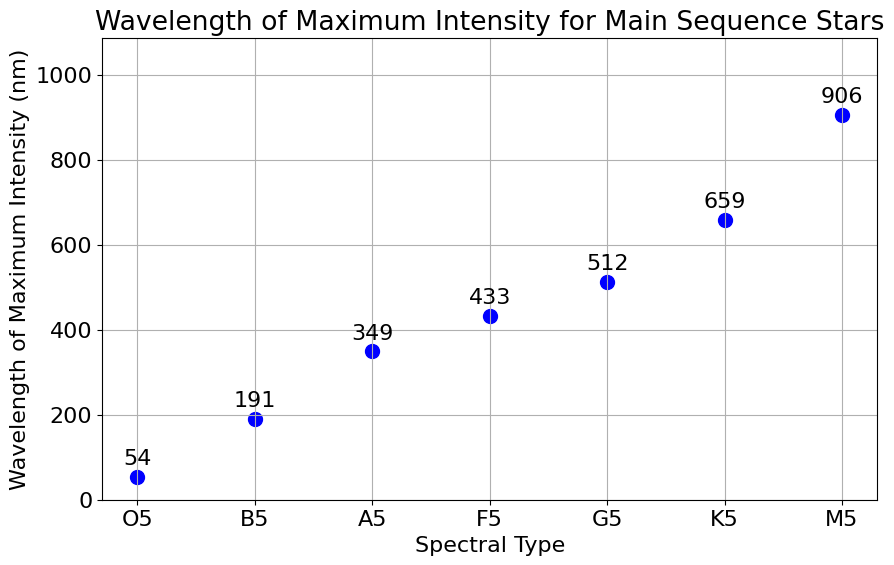

In [4]:
# Wien's constant
b = 2.898e-3  # m·K

# Star types and temperatures (K) from the table
star_types = ['O5', 'B5', 'A5', 'F5', 'G5', 'K5', 'M5']
temperatures = [54000, 15200, 8310, 6700, 5660, 4400, 3200]  # K

# Calculate lambda_max (in meters)
lambda_max_m = [b / T for T in temperatures]

# Convert to nanometers (1 m = 10^9 nm)
lambda_max_nm = [l * 1e9 for l in lambda_max_m]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(star_types, lambda_max_nm, color='blue', s=100)

# Label each data point with its value
for i, (star, l_nm) in enumerate(zip(star_types, lambda_max_nm)):
    plt.text(star, l_nm + 20, f'{l_nm:.0f}', ha='center', va='bottom')

plt.xlabel('Spectral Type')
plt.ylabel('Wavelength of Maximum Intensity (nm)')
plt.title('Wavelength of Maximum Intensity for Main Sequence Stars')
plt.grid(True)
plt.ylim(0, max(lambda_max_nm) * 1.2)  # Adjust y-axis for visibility
plt.show()

In class we will describe the photoelectric effect qualitatively in terms of photons knocking electrons loose from their atoms. Here we will delve into the photoelectric effect quantitatively. Read about the photoelectric effect in your textbook, then read <em>Photoelectric effect step by step</em> in the Quantization module of Canvas. (Note: <em>Photoelectric effect step by step</em> is designed to go along with a lab, which we don't have.)

A note about units: recall from PHYS 208/245 that 1 Volt = 1 Joule/Coulomb. Electrons and protons give us a fundamental unit of electric charge, or elementary charge, $|q| = e = 1.602 \times 10^{−19}$ C. We can also calculate a fundamental unit of energy by calculating the change in kinetic energy of the elementary charge $e$ accelerated through an electric potential of 1 Volt. This new unit of energy is called the electron-Volt or eV. 1 eV = $1.602 \times 10^{−19}$ J.

<ol start=4>
    <li>Assume you are trying to verify the experimental results that led to Einstein's successful explanation of the photoelectric effect. You have two emitters or "photocathodes"; one is made of aluminum and the other is made of gold. On <strong>one set of axes</strong>, plot the <em>maximum</em> photoelectron kinetic energy in eV that you could measure as a function of frequency $\nu$ from <strong>both photocathodes</strong>. Make sure your plot shows the frequency cutoffs below which <em>no</em> photoelectrons will be generated. Label both axes and put a legend on your plot so a reader with no physics experience will know which curve belongs to which metal. You may find this <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Tables/photoelec.html">table of work functions</a> helpful.</li>
</ol>

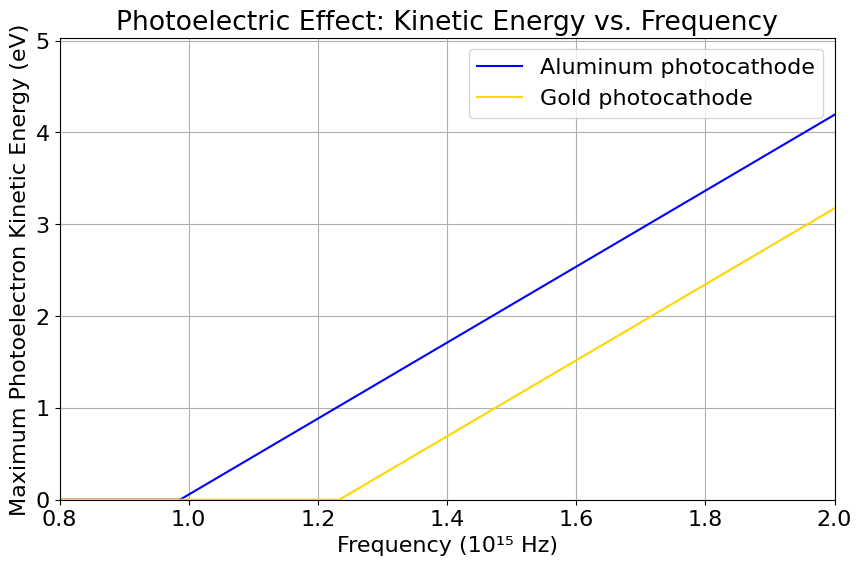

In [5]:
# Planck's constant (eV·s)
h = 4.136e-15

# Work functions (eV) from the table
phi_al = 4.08  # Aluminum
phi_au = 5.1   # Gold

# Threshold frequencies (Hz)
nu0_al = phi_al / h
nu0_au = phi_au / h

# Frequency range (Hz), starting below the lowest cutoff and extending above
nu = np.linspace(0.8e15, 2.0e15, 500)

# Maximum kinetic energy (eV) for each metal
K_max_al = h * nu - phi_al
K_max_au = h * nu - phi_au

# Set K_max to 0 below threshold frequencies
K_max_al = np.where(nu >= nu0_al, K_max_al, 0)
K_max_au = np.where(nu >= nu0_au, K_max_au, 0)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(nu / 1e15, K_max_al, 'b-', label='Aluminum photocathode')
plt.plot(nu / 1e15, K_max_au, 'gold', label='Gold photocathode')
plt.xlabel('Frequency (10¹⁵ Hz)')
plt.ylabel('Maximum Photoelectron Kinetic Energy (eV)')
plt.title('Photoelectric Effect: Kinetic Energy vs. Frequency')
plt.grid(True)
plt.legend()
plt.xlim(0.8, 2.0)
plt.ylim(0, max(K_max_al) * 1.2)
plt.show()